In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import warnings
import json
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('/Users/alenastern/Documents/Spring2018/Machine_Learning/Machine_Learning_Public_Policy/hws/hw2')
import explore as ex
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')

In [14]:
json_file = 'cities.json'

with open(json_file, 'r') as f:
    md = json.load(f)

In [3]:
md

{'Albuquerque city': {'desc': '',
  'name': 'Albuquerque',
  'odp': 'N',
  'odp_launch': '',
  'portal': 'Y',
  'portal_launch': '01-01-2012',
  'portal_type': 'NR',
  'robust_portal': 'Y',
  'state': 'NM',
  'wwc': 'Y'},
 'Alexandria city': {'desc': 'N',
  'name': 'Alexandria',
  'odp': 'N',
  'odp_launch': '',
  'portal': 'Y',
  'portal_launch': '10-30-2014',
  'portal_type': 'GQ',
  'robust_portal': 'N',
  'state': 'VA',
  'wwc': 'N'},
 'Arlington city': {'desc': 'Y',
  'name': 'Arlington',
  'odp': 'N',
  'odp_launch': '',
  'portal': 'N',
  'portal_launch': '',
  'portal_type': 'GQ',
  'state': 'WA',
  'wwc': 'N'},
 'Asheville city': {'desc': 'Y',
  'name': 'Asheville',
  'odp': 'Y',
  'odp_launch': '10-13-2015',
  'portal': 'Y',
  'portal_launch': '06-01-2016',
  'portal_type': 'C',
  'robust_portal': 'Y',
  'state': 'NC',
  'wwc': 'N'},
 'Bainbridge Island city': {'desc': 'Y',
  'name': 'Bainbridge',
  'odp': 'N',
  'odp_launch': '',
  'portal': 'N',
  'portal_launch': '',
  'po

In [21]:
cities = pd.read_csv('../../../WWC_basics.csv')

In [5]:
cities.tail()

,"City, State",State,Pol_Lean_State,Region,Population 2015,Population,Median Income 2015,Median Income,%White 2015,% Non-White 2010 (unless noted),% White Using 2015 Data and 2010 Data if 2015 Not Available,% White,Budget_1617,Governance,Mayor,City Manager,Exec_Party,Next Election Date,City Priorities,City Priorities Source,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Lines of Work,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Focus Area,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,City POC Primary,POC Primary Email,Effective Speaker (POC),City POC Secondary,POC Secondary Email,Effective Speaker (POC).1,RFA Lead,Notes,"City, State.1",Unnamed: 77,City
132,"Alexandria, VA",VA,Competitive,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.524366e+09,Council-Manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,"Winchester, VA",VA,Competitive,South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.814126e+08,Council-Manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,"Palo Alto, CA",CA,Solid Democratic,Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.261000e+08,Council-Manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,"Renton, WA",WA,Lean Democratic,Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.423496e+08,Mayor-Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,"Dayton, OH",OH,Competitive,East North Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.891055e+08,Commissioner-Manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
cs = cities['City, State'].str.split(",", expand = True)
cities['city'] = cs[0] + ' city'

In [23]:
cities = cities[['city', 'State', 'Pol_Lean_State', 'Region', 'Governance', 'Budget_1617']]
counties = pd.read_csv('counties.csv')
cities = pd.concat([cities, counties])

## Robust Policy Data Clean

In [28]:
robust = pd.read_csv('docs_guidelines.tsv', delimiter = "\t", encoding='utf-8')

In [29]:
robust[robust['City'] == 'Salt Lake City']

,Doc ID,City,State,Place ID,Date,Legal means,URL,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
135,salt-lake-city-ut-2014,Salt Lake City,UT,salt-lake-city-ut,NaN,Legislation,https://www.opendatapolicies.org/doc/salt-lake...,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [30]:
# Replace cities with opposite and close fit

## Denton, TX
mask = robust['Place ID'] == 'denton-tx'
column_name = ['26', '12', '10']
for name in column_name:
    robust.loc[mask, column_name] = .5
robust.loc[mask, '16'] = -1

In [31]:
## Washington, DC
mask = robust['Doc ID'] == 'washington-dc-2014-07-21'
column_name = ['22', '9']
for name in column_name:
    robust.loc[mask, column_name] = .5

In [32]:
## San Francisco, CA
mask = robust['Doc ID'] == 'san-francisco-ca-2013-03-28'
column_name = ['28', '24', '23']
for name in column_name:
    robust.loc[mask, column_name] = .5

In [33]:
## Oakland, CA
mask = robust['Doc ID'] == 'oakland-ca-2013-10-15'
column_name = ['8', '13', '28']
for name in column_name:
    robust.loc[mask, column_name] = .5

In [34]:
## West Sacramento, CA
mask = robust['Doc ID'] == 'west-sacramento-ca-2013-10-16'
column_name = ['2', '22', '24', '27']
for name in column_name:
    robust.loc[mask, column_name] = .5

In [35]:
## Sacramento, CA
mask = robust['Doc ID'] == 'sacramento-ca-2013'
column_name = ['4', '13']
for name in column_name:
    robust.loc[mask, column_name] = .5

In [36]:
## Las Vegas, NV
mask = robust['Doc ID'] == 'las-vegas-nv-2014-01-30'
column_name = ['10', '11', '13', '5', '1']
for name in column_name:
    robust.loc[mask, column_name] = .5

In [37]:
## Salt Lake City, UT
mask = robust['Doc ID'] == 'salt-lake-city-ut-2014'
column_name = ['8', '10', '28']
for name in column_name:
    robust.loc[mask, column_name] = .5

In [38]:
## Waco, TX
mask = robust['Doc ID'] == 'waco-tx-2015-12-15'
column_name = ['11', '29']
for name in column_name:
    robust.loc[mask, column_name] = .5

In [39]:
max_all = pd.DataFrame(robust.groupby('Place ID').max())

In [40]:
max_all[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']] = max_all[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']].apply(pd.to_numeric)

In [41]:
max_all['total'] = max_all[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']].sum(axis=1)

In [42]:
max_all.reset_index(inplace=True)
max_all = max_all[['Place ID', 'total']]

In [43]:
max_all[max_all['total'] == 0.0]
# cape coral, fort worth, greensboro, palo alto, riverside in list

,Place ID,total
3,arlington-tx,0.0
6,baltimore-md,0.0
7,baton-rouge-la,0.0
8,bay-area-rapid-transit-ca,0.0
9,bellevue-wa,0.0
10,bethlehem-pa,0.0
16,buffalo-ny,0.0
18,cape-coral-fl,0.0
20,charlottesville-va,0.0
23,cincinnati-oh,0.0


In [172]:
filepath = '/Users/alenastern/Google Drive File Stream/My Drive/Alena_Project/PR_Data/{}.csv'.format('Albuquerque')
df = pd.read_csv(filepath)


In [138]:
df.head()

,Reference No,Request Status,requester,request,departments,cost,PoC,Create Date,Close Date
0,18-3715,open,Melissa Williams,Case Files,Albuquerque Police Department,0,Nyvia Barraza,28-Jun-18,NaN
1,18-3714,open,No name available,Case Files,Albuquerque Police Department,1.36,Nyvia Barraza,28-Jun-18,NaN
2,18-3713,open,Heather Hine-Berenson & Associates PC,Lapel and Traffic Cam,Albuquerque Police Department,1.36,Nyvia Barraza,28-Jun-18,NaN
3,18-3712,open,Ashley Newman,Background Check,Albuquerque Police Department,0,Nyvia Barraza,28-Jun-18,NaN
4,18-3711,open,Ashley Newman,Background Check,Albuquerque Police Department,1.36,Nyvia Barraza,28-Jun-18,NaN


In [173]:
df['requester'] = df.requester.str.lower()
df.head()

,Reference No,Request Status,requester,request,departments,cost,PoC,Create Date,Close Date
0,18-3715,open,melissa williams,Case Files,Albuquerque Police Department,0,Nyvia Barraza,28-Jun-18,NaN
1,18-3714,open,no name available,Case Files,Albuquerque Police Department,1.36,Nyvia Barraza,28-Jun-18,NaN
2,18-3713,open,heather hine-berenson & associates pc,Lapel and Traffic Cam,Albuquerque Police Department,1.36,Nyvia Barraza,28-Jun-18,NaN
3,18-3712,open,ashley newman,Background Check,Albuquerque Police Department,0,Nyvia Barraza,28-Jun-18,NaN
4,18-3711,open,ashley newman,Background Check,Albuquerque Police Department,1.36,Nyvia Barraza,28-Jun-18,NaN


In [180]:
df['Create Date'] = pd.to_datetime(df['Create Date'])
df['month_year'] = df['Create Date'].dt.to_period('M')
month_req_count = df.groupby('month_year').requester.nunique()

In [181]:
month_req_count.index = month_req_count.index.to_series().astype(str)

In [187]:
month_req_count.head()

,month_year,count_req
0,2015-01,1
1,2015-08,24
2,2015-09,102
3,2015-10,118
4,2015-11,163


In [183]:
month_req_count = month_req_count.reset_index()

In [185]:
month_count = df.groupby('month_year').count()
month_count.rename(index=str, columns={"Create Date": "count"}, inplace = True)
month_count.index = month_count.index.to_series().astype(str)
month_count = month_count.reset_index()
month_count = month_count[['month_year', 'count']]

In [186]:
month_req_count.rename(index=str, columns={"requester": "count_req"}, inplace = True)
month_req_count = month_req_count[['month_year', 'count_req']]


In [188]:
mc = month_req_count.merge(month_count, how = 'left', on = 'month_year')

In [168]:
month_count['month_year'] = month_count.month_year.apply(str)

In [159]:
month_req_count['month_year'] = month_req_count['month_year'].to_series().astype(str)

In [189]:
mc.head()

,month_year,count_req,count
0,2015-01,1,1
1,2015-08,24,32
2,2015-09,102,149
3,2015-10,118,155
4,2015-11,163,226


In [15]:
data = pd.DataFrame(columns = ['month_year', 'count', 'city', 'state', 'odp_date', 'policy', 'portal_date', 'portal', 
                              'year', 'months', '2015', '2016', '2017', '2018'])
for key, value in md.items():
    city = value['name']
    filepath = '/Users/alenastern/Google Drive File Stream/My Drive/Alena_Project/PR_Data/{}.csv'.format(city)
    try:
        df = pd.read_csv(filepath)
    except:
        try:
            df = pd.read_csv(filepath, encoding='mac_roman')
        except:
            continue
    print(key)
    try:
        df['Create Date'] = pd.to_datetime(df['Create Date'])
    except:
        df['New'] = pd.to_datetime(df['Create Date'].apply(lambda x: re.findall('^\S*', x)[0]))
        df.drop(columns=['Create Date'], inplace = True)
        df.rename(index=str, columns={"New": "Create Date"}, inplace = True)

    # count number of requests per month     
    df['month_year'] = df['Create Date'].dt.to_period('M')
    month_count = df.groupby('month_year').count()
    month_count.rename(index=str, columns={"Create Date": "count"}, inplace = True)
    month_count.index = month_count.index.to_series().astype(str)
    month_count = month_count.reset_index()
    month_count = month_count[['month_year', 'count']]
    
    # count unique requesters each month
    if value['req'] == 'Y':
        df['requester'] = df.requester.str.lower()
        month_req_count = df.groupby('month_year').requester.nunique()
        month_req_count.index = month_req_count.index.to_series().astype(str)
        month_req_count = month_req_count.reset_index()
        month_req_count.rename(index=str, columns={"requester": "count_req"}, inplace = True)
        month_req_count = month_req_count[['month_year', 'count_req']]
        mc = month_count.merge(month_req_count, how = 'left', on = 'month_year')
        mc['count_diff'] = mc['count'] - mc['count_req']
        mc['req_ratio'] = mc['count_req']/mc['count']
        
    else:
        month_count['count_req'] = 'NaN'
        month_count['count_diff'] = 'NaN'
        month_count['req_ratio'] = 'NaN'
        mc = month_count.copy()
    
    #remove June and July data
    mc = mc[((mc['month_year'] != '07-2018') & (mc['month_year'] != '2018-07') 
            & (mc['month_year'] != '06-2018') & (mc['month_year'] != '2018-06'))] 
    mc['city'] = key
    mc['state'] = value['state']
    if value['odp'] == "Y":
        odp_dl = value['odp_launch'].split('-')
        mc['odp_date'] = dt.datetime(int(odp_dl[2]),int(odp_dl[0]),int(odp_dl[1]))
        mc['policy'] = np.where(pd.to_datetime(mc['month_year'])< mc['odp_date'], 0, 1)
        mc['policy_months'] = ((pd.to_datetime(mc['month_year']).dt.year - mc['odp_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['odp_date'].dt.month)
        mc['policy_lag3'] = np.where(((pd.to_datetime(mc['month_year']).dt.year - mc['odp_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['odp_date'].dt.month) < 3, 0, 1)
        mc['policy_lag6'] = np.where(((pd.to_datetime(mc['month_year']).dt.year - mc['odp_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['odp_date'].dt.month) < 6, 0, 1)
        mc['policy_months_lag3'] = ((pd.to_datetime(mc['month_year']).dt.year - mc['odp_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['odp_date'].dt.month) - 3
        mc['policy_months_lag6'] = ((pd.to_datetime(mc['month_year']).dt.year - mc['odp_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['odp_date'].dt.month) - 6
    else:
        mc['odp_date'] = 'NaN'
        mc['policy'] = 0
        mc['policy_months'] = 0
        mc['policy_lag3'] = 0
        mc['policy_months_lag3'] = 0
        mc['policy_lag6'] = 0
        mc['policy_months_lag6'] = 0
        
    if value['portal'] == "Y":
        portal_dl = value['portal_launch'].split('-')
        mc['portal_date'] = dt.datetime(int(portal_dl[2]),int(portal_dl[0]),int(portal_dl[1]))
        mc['portal'] = np.where(pd.to_datetime(mc['month_year'])< mc['portal_date'], 0, 1)
        mc['portal_months'] = ((pd.to_datetime(mc['month_year']).dt.year - mc['portal_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['portal_date'].dt.month)
        mc['portal_lag3'] = np.where(((pd.to_datetime(mc['month_year']).dt.year - mc['portal_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['portal_date'].dt.month) < 3, 0, 1)
        mc['portal_lag6'] = np.where(((pd.to_datetime(mc['month_year']).dt.year - mc['portal_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['portal_date'].dt.month) < 6, 0, 1)
        mc['portal_months_lag3'] = ((pd.to_datetime(mc['month_year']).dt.year - mc['portal_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['portal_date'].dt.month) - 3
        mc['portal_months_lag6'] = ((pd.to_datetime(mc['month_year']).dt.year - mc['portal_date'].dt.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - mc['portal_date'].dt.month) - 6
        if value['robust_portal'] == "Y":
            mc['robust_portal'] = mc['portal']
            mc['robust_portal_lag3'] = mc['portal_lag3']
            mc['robust_portal_lag6'] = mc['portal_lag6']
        else: 
            mc['robust_portal'] = 0
    else:
        mc['portal_date'] = 'NaN'
        mc['portal'] = 0
        mc['portal_months'] = 0
        mc['portal'] = 0
        mc['portal_months'] = 0
        mc['portal_lag3'] = 0
        mc['portal_months_lag3'] = 0
        mc['portal_lag6'] = 0
        mc['portal_months_lag6'] = 0
        mc['robust_portal'] = 0
        mc['robust_portal_lag3'] = 0
        mc['robust_portal_lag6'] = 0
        
    mc['year'] = pd.to_datetime(mc['month_year']).dt.year
    
    first_month = min(df['month_year'])
    
    #remove first month of data
    mc = mc[mc['month_year'] != str(first_month)]
    
    mc['months'] = ((pd.to_datetime(mc['month_year']).dt.year - first_month.year) * 12 + 
            pd.to_datetime(mc['month_year']).dt.month - first_month.month)


    
    mc['2015'] = np.where(mc['year']== 2015, 1, 0)
    mc['2016'] = np.where(mc['year']== 2016, 1, 0)
    mc['2017'] = np.where(mc['year']== 2017, 1, 0)
    mc['2018'] = np.where(mc['year']== 2018, 1, 0)
    
    data = pd.concat([data, mc])
        

Albuquerque city
Alexandria city
Arlington city
Asheville city
Bainbridge Island city
Belleville city
Bellevue city
Boulder County
Cape Coral city
Cathedral City city
Clark county
Clearwater city
Corona city
Dayton city
Denton city
El Dorado County
Everett city
Fort Collins city
Fort Worth city
Galveston city
Greensboro city
Hayward city
Joliet city
Kirkland city
Laredo city
Las Cruces city
Las Vegas city
Lynnwood city
Mercer Island city
Miami city
Middleborough town
New Orleans city
Oakland city
Oklahoma City city
Olympia city
Palo Alto city
Peoria city
Providence city
Pullman city
Rancho Cucamonga city
Redmond city
Renton city
Riverside city
Sacramento city
Salt Lake City city
San Francisco city
San Mateo city
Tukwila city
Vallejo city
Washington city
West Sacramento city
Winchester city


In [121]:
len(data.city.unique())

52

In [192]:
data.head()

,2015,2016,2017,2018,city,count,count_diff,count_req,month_year,months,odp_date,policy,policy_lag3,policy_lag6,policy_months,policy_months_lag3,policy_months_lag6,portal,portal_date,portal_lag3,portal_lag6,portal_months,portal_months_lag3,portal_months_lag6,req_ratio,robust_portal,robust_portal_lag3,robust_portal_lag6,state,year
1,1,0,0,0,Albuquerque city,32,8,24,2015-08,7,NaN,0,0.0,0.0,0.0,0.0,0.0,1,2012-01-01 00:00:00,1.0,1.0,43.0,40.0,37.0,0.75,1.0,1.0,1.0,NM,2015
2,1,0,0,0,Albuquerque city,149,47,102,2015-09,8,NaN,0,0.0,0.0,0.0,0.0,0.0,1,2012-01-01 00:00:00,1.0,1.0,44.0,41.0,38.0,0.684564,1.0,1.0,1.0,NM,2015
3,1,0,0,0,Albuquerque city,155,37,118,2015-10,9,NaN,0,0.0,0.0,0.0,0.0,0.0,1,2012-01-01 00:00:00,1.0,1.0,45.0,42.0,39.0,0.76129,1.0,1.0,1.0,NM,2015
4,1,0,0,0,Albuquerque city,226,63,163,2015-11,10,NaN,0,0.0,0.0,0.0,0.0,0.0,1,2012-01-01 00:00:00,1.0,1.0,46.0,43.0,40.0,0.721239,1.0,1.0,1.0,NM,2015
5,1,0,0,0,Albuquerque city,234,76,158,2015-12,11,NaN,0,0.0,0.0,0.0,0.0,0.0,1,2012-01-01 00:00:00,1.0,1.0,47.0,44.0,41.0,0.675214,1.0,1.0,1.0,NM,2015


In [17]:
cd = pd.read_csv('city_data.csv')

In [18]:
cd09 = pd.read_csv('city_data_2009.csv')

In [29]:
cd09.tail()

,population_09,median_age_09,median_income_09,NAME,place,state,year,pct_25_34_09,pct_male_09,pct_black_09,pct_white_09,pct_hispanic_09,pct_bachelor_09,city,state_name,state_code
25300,228,49.4,18750.0,"Yoder town, Wyoming",86665,56,2009,0.000000,0.421053,0.000000,1.000000,0.026316,0.035088,Yoder town,Wyoming,WY
25301,234,52.8,23725.0,"Y-O Ranch CDP, Wyoming",86737,56,2009,0.128205,0.482906,0.000000,0.811966,0.188034,0.000000,Y-O Ranch CDP,Wyoming,WY
25302,175941,41.6,32319.0,"El Dorado County, California",17,6,2009,0.087336,0.502015,0.004411,0.874043,0.115050,0.143798,El Dorado County,California,CA
25303,295524,35.0,29049.0,"Boulder County, Colorado",13,8,2009,0.111680,0.506098,0.008943,0.875167,0.129803,0.199612,Boulder County,Colorado,CO
25304,21051,35.7,31649.0,"Middleborough town, Plymouth County, Massachus...",2340850,25,2009,0.094770,0.507244,0.025842,0.927462,0.012018,0.079236,Middleborough town,Plymouth County,MA


In [30]:
 data.groupby('city').count()

,2015,2016,2017,2018,count,month_year,months,odp_date,policy,policy_lag3,policy_lag6,policy_months,policy_months_lag3,policy_months_lag6,portal,portal_date,portal_lag3,portal_lag6,portal_months,portal_months_lag3,portal_months_lag6,robust_portal,robust_portal_lag3,robust_portal_lag6,state,year
city,,,,,,,,,,,,,,,,,,,,,,,,,,
Albuquerque city,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
Alexandria city,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,0,0,94,94
Arlington city,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
Asheville city,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Bainbridge Island city,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Belleville city,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
Bellevue city,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,6,6
Boulder County,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,0,8,8
Cape Coral city,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2


In [19]:
data['city_state'] = data['city'] + data['state']
cd['city_state'] = cd['city'] + cd['state_code']
cd09['city_state'] = cd09['city'] + cd09['state_code']
cd_mg = data.merge(cd, how ='left', on = 'city_state')
cd_mg = cd_mg.merge(cd09, how = 'left', on = 'city_state')
cd_mg.rename(index=str, columns={'city_x': 'city'}, inplace = True)

In [55]:
cd.drop(columns=['year'], inplace = True)
cd09.drop(columns=['year'], inplace = True)

ValueError: labels ['year'] not contained in axis

In [24]:
cities['city_state'] = cities['city'] + cities['State']

In [25]:
cities['Place ID'] = cities['city'].str.lower().str.replace(' city', '').str.replace(' ','-') + '-' + cities['State'].str.lower()

In [26]:
cities.head()

,city,State,Pol_Lean_State,Region,Governance,Budget_1617,city_state,Place ID
0,Albuquerque city,NM,Solid Democratic,Mountain,Mayor-Council,526400000.0,Albuquerque cityNM,albuquerque-nm
1,Anchorage city,AK,Solid Republican,Pacific,Council-Manager,489800000.0,Anchorage cityAK,anchorage-ak
2,Arlington city,TX,Lean Republican,West South Central,Council-Manager,234400000.0,Arlington cityTX,arlington-tx
3,Athens-Clarke city,GA,Competitive,South Atlantic,Mayor-Council,120700000.0,Athens-Clarke cityGA,athens-clarke-ga
4,Augusta city,GA,Competitive,South Atlantic,Mayor-Commission,788000000.0,Augusta cityGA,augusta-ga


In [56]:
mc_mg = cd_mg.merge(cities, how ='left', on = 'city_state')
mc_mg = mc_mg.merge(max_all, how = 'left', on = 'Place ID')

In [57]:
mc_mg.columns

Index(['2015', '2016', '2017', '2018', 'city_x', 'count', 'count_diff', 'count_req', 'month_year', 'months', 'odp_date', 'policy', 'policy_lag3', 'policy_lag6', 'policy_months', 'policy_months_lag3', 'policy_months_lag6', 'portal', 'portal_date', 'portal_lag3', 'portal_lag6', 'portal_months', 'portal_months_lag3', 'portal_months_lag6', 'req_ratio', 'robust_portal', 'robust_portal_lag3', 'robust_portal_lag6', 'state_x', 'year_x', 'city_state', 'NAME_x', 'population', 'm_25_29', 'm_30_34', 'f_25_29', 'f_30_34', 'total_male', 'total_white', 'total_black', 'total_hispanic', 'median_age', 'median_gross_rent', 'median_income', 'total_bachelor', 'state_y', 'place_x', 'year_y', 'pct_25_34', 'pct_male', 'pct_black', 'pct_white', 'pct_hispanic', 'pct_bachelor', 'city_y', 'state_name_x', 'state_code_x', 'population_09', 'median_age_09', 'median_income_09', 'NAME_y', 'place_y', 'state', 'year', 'pct_25_34_09', 'pct_male_09', 'pct_black_09', 'pct_white_09', 'pct_hispanic_09', 'pct_bachelor_09',
   

In [58]:
mc_mg['robust_policy'] = np.where((mc_mg['total'] > 16) & (mc_mg['policy'] == 1), 1, 0)
mc_mg['robust_policy_lag3'] = np.where((mc_mg['total'] > 16) & (mc_mg['policy_lag3'] == 1), 1, 0)
mc_mg['robust_policy_lag6'] = np.where((mc_mg['total'] > 16) & (mc_mg['policy_lag6'] == 1), 1, 0)

In [59]:
# create year dummies
#mc_mg['2013'] = np.where(mc_mg['year_x']== 2013, 1, 0)
#mc_mg['2014'] = np.where(mc_mg['year_x']== 2014, 1, 0)
mc_mg['2015'] = np.where(mc_mg['year_x']== 2015, 1, 0)
mc_mg['2016'] = np.where(mc_mg['year_x']== 2016, 1, 0)
mc_mg['2017'] = np.where(mc_mg['year_x']== 2017, 1, 0)
mc_mg['2018'] = np.where(mc_mg['year_x']== 2018, 1, 0)

In [39]:
# create time since policy dummies
#mc_mg['0_6mos_odp'] = np.where((mc_mg['time']>= 0) & (mc_mg['time']<6), 1, 0)
#mc_mg['6_12mos_odp'] = np.where((mc_mg['time']>= 6) & (mc_mg['time']<12), 1, 0)
#mc_mg['12_18mos_odp'] = np.where((mc_mg['time']>= 12) & (mc_mg['time']<18), 1, 0)
#mc_mg['18_24mos_odp'] = np.where((mc_mg['time']>= 18) & (mc_mg['time']<24), 1, 0)
#mc_mg['over_24mos_odp'] = np.where(mc_mg['time']>= 24, 1, 0)

In [60]:
# create governance dummies
mc_mg['mayor_council'] = np.where(mc_mg['Governance']== 'Mayor-Council', 1, 0)
mc_mg['council_manager'] = np.where(mc_mg['Governance']== 'Council-Manager', 1, 0)
#mc_mg['mayor_commission'] = np.where(mc_mg['Governance']== 'Mayor-Commission', 1, 0)
#mc_mg['commissioner_manager'] = np.where(mc_mg['Governance']== 'Commissioner-Manager', 1, 0)
#mc_mg['other'] = np.where((mc_mg['Governance']!= 'Council-Manager') & (mc_mg['Governance']!= 'Mayor-Council'), 1, 0)

In [61]:
# create state political lean dummies
#mc_mg['competitive'] = np.where(mc_mg['Pol_Lean_State']== 'Competitive', 1, 0)
#mc_mg['lean_dem'] = np.where(mc_mg['Pol_Lean_State']== 'Lean Democratic', 1, 0)
#mc_mg['solid_dem'] = np.where(mc_mg['Pol_Lean_State']== 'Solid Democratic', 1, 0)
#mc_mg['lean_rep'] = np.where(mc_mg['Pol_Lean_State']== 'Lean Republican', 1, 0)
#mc_mg['solid_rep'] = np.where(mc_mg['Pol_Lean_State']== 'Solid Republicans', 1, 0)

mc_mg['rep'] = np.where((mc_mg['Pol_Lean_State']== 'Lean Republican') | (mc_mg['Pol_Lean_State']== 'Solid Republican'), 1, 0)
mc_mg['dem'] = np.where((mc_mg['Pol_Lean_State']== 'Lean Democratic') | (mc_mg['Pol_Lean_State']== 'Solid Democratic'), 1, 0)


In [42]:
# create interaction effect variables
#mc_mg['policy'] = pd.to_numeric(mc_mg['policy'])

#mc_mg['pop_treat'] = mc_mg['population'] * mc_mg['policy']
#mc_mg['age_treat'] = mc_mg['median_age'] * mc_mg['policy']
#mc_mg['rent_treat'] = mc_mg['median_gross_rent'] * mc_mg['policy']
#mc_mg['income_treat'] = mc_mg['median_income'] * mc_mg['policy']
#mc_mg['25_treat'] = mc_mg['pct_25_34'] * mc_mg['policy']
#mc_mg['male_treat'] = mc_mg['pct_male'] * mc_mg['policy']
#mc_mg['black_treat'] = mc_mg['pct_black'] * mc_mg['policy']
#mc_mg['bachelor_treat'] = mc_mg['pct_bachelor'] * mc_mg['policy']
#mc_mg['budget_treat'] = mc_mg['Budget_1617'] * mc_mg['policy']
#mc_mg['2015_treat'] = mc_mg['2015'] * mc_mg['policy']
#mc_mg['2016_treat'] = mc_mg['2016'] * mc_mg['policy']
#mc_mg['2017_treat'] = mc_mg['2017'] * mc_mg['policy']
#mc_mg['2018_treat'] = mc_mg['2018'] * mc_mg['policy']
#mc_mg['mayor_treat'] = mc_mg['mayor_council'] * mc_mg['policy']
#mc_mg['manager_treat'] = mc_mg['council_manager'] * mc_mg['policy']
#mc_mg['dem_treat'] = mc_mg['dem'] * mc_mg['policy']
#mc_mg['rep_treat'] = mc_mg['rep'] * mc_mg['policy']
#mc_mg['time_treat'] = mc_mg['months'] * mc_mg['policy']
#mc_mg['time_pol_treat'] = mc_mg['policy_months'] * mc_mg['policy']
#mc_mg['time_port_treat'] = mc_mg['portal_months']* mc_mg['policy']

In [62]:
# create dosage variable
mc_mg['treat_score'] = mc_mg['policy'] + mc_mg['portal'] + mc_mg['robust_portal'] + mc_mg['robust_policy']

In [71]:
clean_data = mc_mg[['month_year', 'count', 'count_req', 'city_x', 'state_x', 'months', 'policy_months', 'portal_months','policy', 
                    'portal','population',  'median_age', 'median_gross_rent', 'median_income', 'pct_25_34', 'pct_male',
                  'pct_black', 'pct_white', 'pct_bachelor', 'Budget_1617', '2015',
                  '2016', '2017', '2018','mayor_council', 'council_manager', 'dem', 'rep', 'population_09', 
                    'median_age_09', 'median_income_09', 'pct_25_34_09', 'pct_male_09', 'pct_black_09', 'pct_white_09',
                    'pct_bachelor_09', 'robust_portal','treat_score', 'year_x', 'robust_policy', 'count_diff', 'req_ratio']]
clean_data[['count', 'months', 'policy_months', 'portal_months','policy', 
                    'portal','population',  'median_age', 'median_gross_rent', 'median_income', 'pct_25_34', 'pct_male',
                  'pct_black', 'pct_white', 'pct_bachelor', 'Budget_1617', '2015',
                  '2016', '2017', '2018','mayor_council', 'council_manager', 'dem', 'rep',
                  'robust_portal','treat_score', 'population_09', 
                    'median_age_09', 'median_income_09', 'pct_25_34_09', 'pct_male_09', 'pct_black_09', 'pct_white_09',
                    'pct_bachelor_09', 'year_x', 'robust_policy']] = clean_data[['count', 'months', 'policy_months', 'portal_months','policy', 
                    'portal','population',  'median_age', 'median_gross_rent', 'median_income', 'pct_25_34', 'pct_male',
                  'pct_black', 'pct_white', 'pct_bachelor', 'Budget_1617', '2015',
                  '2016', '2017', '2018','mayor_council', 'council_manager', 'dem', 'rep',
                   'robust_portal','treat_score', 'population_09', 
                    'median_age_09', 'median_income_09', 'pct_25_34_09', 'pct_male_09', 'pct_black_09', 'pct_white_09',
                    'pct_bachelor_09', 'year_x', 'robust_policy']].apply(pd.to_numeric)
clean_data['month_year'] = pd.to_datetime(clean_data['month_year'], format = '%Y-%m-%d')

In [72]:
clean_data.to_csv('clean_data.csv', index = False)

In [3]:
clean_data = pd.read_csv('clean_data.csv')

In [73]:
clean_data = clean_data.loc[:, ~clean_data.columns.duplicated()]
clean_data.columns

Index(['month_year', 'count', 'count_req', 'city_x', 'state_x', 'months', 'policy_months', 'portal_months', 'policy', 'portal', 'population', 'median_age', 'median_gross_rent', 'median_income', 'pct_25_34', 'pct_male', 'pct_black', 'pct_white', 'pct_bachelor', 'Budget_1617', '2015', '2016', '2017', '2018', 'mayor_council', 'council_manager', 'dem', 'rep', 'population_09', 'median_age_09', 'median_income_09', 'pct_25_34_09', 'pct_male_09', 'pct_black_09', 'pct_white_09', 'pct_bachelor_09', 'robust_portal', 'treat_score', 'year_x', 'robust_policy', 'count_diff', 'req_ratio'], dtype='object')

In [85]:
gp = clean_data.groupby('city_x').count()
gp.reset_index(inplace=True)
gp = pd.DataFrame(gp)
cities_10 = gp[gp['2015'] < 10]
cities = list(cities_10['city_x'])
clean_data_10 = clean_data[~clean_data['city_x'].isin(cities)]
clean_data_nocc = clean_data[clean_data['city_x'] != 'Cape Coral city']
cities_90 = gp[gp['2015'] > 90]
cities_90 = list(cities_90['city_x'])
clean_data_2011 = clean_data[pd.to_numeric(clean_data['year_x']) >= 2011]

In [10]:
cd9 = clean_data[clean_data['year'] == 2009.0]

In [80]:
cities9010 = cities_90 + cities

In [84]:
clean_data_9010 = clean_data[~clean_data['city_x'].isin(cities9010)]
clean_data_9010.to_csv('clean_data_9010.csv', index = False)

In [86]:
clean_data_10.to_csv('clean_data_10.csv', index = False)
clean_data_nocc.to_csv('clean_data_nocc.csv', index = False)

In [50]:
clean_data_90 = clean_data[~clean_data['city_x'].isin(cities_90)]
clean_data_90.to_csv('clean_data_90.csv', index = False)

In [76]:
clean_data_2011.to_csv('clean_data_2011.csv', index= False)

In [52]:
clean_data.to_csv('clean_data.csv', index = False)

In [136]:
clean_data.head()

,month_year,count,count_req,city_x,city_x,state_x,months,policy_months,portal_months,policy,portal,population,median_age,median_gross_rent,median_income,pct_25_34,pct_male,pct_black,pct_white,pct_bachelor,Budget_1617,2015,2016,2017,2018,mayor_council,council_manager,dem,rep,population_09,median_age_09,median_income_09,pct_25_34_09,pct_male_09,pct_black_09,pct_white_09,pct_bachelor_09,robust_portal,treat_score,year,robust_policy,count_diff,req_ratio
0,2015-08-01,32,NaN,Albuquerque city,Albuquerque city,NM,7,0.0,43.0,0,1,556859.0,36.0,816.0,26910.0,0.157106,0.486782,0.032753,0.720615,0.125156,526400000.0,1,0,0,0,1,0,1,0,515107.0,34.3,25584.0,0.164783,0.490131,0.034793,0.682959,0.119395,1.0,2.0,2009.0,0,NaN,NaN
1,2015-09-01,149,NaN,Albuquerque city,Albuquerque city,NM,8,0.0,44.0,0,1,556859.0,36.0,816.0,26910.0,0.157106,0.486782,0.032753,0.720615,0.125156,526400000.0,1,0,0,0,1,0,1,0,515107.0,34.3,25584.0,0.164783,0.490131,0.034793,0.682959,0.119395,1.0,2.0,2009.0,0,NaN,NaN
2,2015-10-01,155,NaN,Albuquerque city,Albuquerque city,NM,9,0.0,45.0,0,1,556859.0,36.0,816.0,26910.0,0.157106,0.486782,0.032753,0.720615,0.125156,526400000.0,1,0,0,0,1,0,1,0,515107.0,34.3,25584.0,0.164783,0.490131,0.034793,0.682959,0.119395,1.0,2.0,2009.0,0,NaN,NaN
3,2015-11-01,226,NaN,Albuquerque city,Albuquerque city,NM,10,0.0,46.0,0,1,556859.0,36.0,816.0,26910.0,0.157106,0.486782,0.032753,0.720615,0.125156,526400000.0,1,0,0,0,1,0,1,0,515107.0,34.3,25584.0,0.164783,0.490131,0.034793,0.682959,0.119395,1.0,2.0,2009.0,0,NaN,NaN
4,2015-12-01,234,NaN,Albuquerque city,Albuquerque city,NM,11,0.0,47.0,0,1,556859.0,36.0,816.0,26910.0,0.157106,0.486782,0.032753,0.720615,0.125156,526400000.0,1,0,0,0,1,0,1,0,515107.0,34.3,25584.0,0.164783,0.490131,0.034793,0.682959,0.119395,1.0,2.0,2009.0,0,NaN,NaN


In [53]:
clean_data.columns

Index(['month_year', 'count', 'city_x', 'city_x.1', 'state_x', 'months', 'policy_months', 'portal_months', 'policy', 'portal', 'population', 'median_age', 'median_gross_rent', 'median_income', 'pct_25_34', 'pct_male', 'pct_black', 'pct_white', 'pct_bachelor', 'Budget_1617', '2015', '2016', '2017', '2018', 'mayor_council', 'council_manager', 'dem', 'rep', 'population_09', 'median_age_09', 'median_income_09', 'pct_25_34_09', 'pct_male_09', 'pct_black_09', 'pct_white_09', 'pct_bachelor_09', 'robust_portal', 'treat_score', 'year', 'robust_policy'], dtype='object')

# Data Exploration

In [54]:
#Summary statistics for variables
ex.dist_table(clean_data)

,count,months,policy_months,portal_months,policy,portal,population,median_age,median_gross_rent,median_income,pct_25_34,pct_male,pct_black,pct_white,pct_bachelor,Budget_1617,2015,2016,2017,2018,mayor_council,council_manager,dem,rep,population_09,median_age_09,median_income_09,pct_25_34_09,pct_male_09,pct_black_09,pct_white_09,pct_bachelor_09,robust_portal,treat_score,year,robust_policy
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1.307000e+03,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.0,1312.000000
mean,129.886433,26.356707,8.980945,8.972561,0.280488,0.416921,214673.975610,35.330183,1144.455793,31575.442835,0.165702,0.489456,0.136216,0.651947,0.149342,9.133150e+08,0.110518,0.223323,0.334604,0.176829,0.336128,0.622713,0.610518,0.133384,193416.874238,34.301601,29107.285061,0.160987,0.492681,0.137320,0.660088,0.139701,0.168445,0.908537,2009.0,0.042683
std,187.464881,23.605308,28.168672,31.201114,0.449409,0.493238,214017.718345,4.329263,346.003187,12255.354831,0.034922,0.012748,0.133884,0.155604,0.053369,2.100348e+09,0.313654,0.416632,0.472032,0.381670,0.472563,0.484892,0.487819,0.340119,188389.025675,4.050046,10504.832654,0.039352,0.014263,0.136421,0.166606,0.054212,0.374404,1.218039,0.0,0.202218
min,1.000000,1.000000,-71.000000,-97.000000,0.000000,0.000000,18749.000000,22.000000,636.000000,9733.000000,0.064769,0.454851,0.009281,0.340338,0.069277,2.808853e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16500.000000,21.900000,8022.000000,0.050449,0.463034,0.004411,0.318122,0.064404,0.000000,0.000000,2009.0,0.000000
25%,16.000000,9.000000,0.000000,0.000000,0.000000,0.000000,51386.000000,33.800000,907.000000,24895.000000,0.149166,0.482291,0.024560,0.519345,0.112733,1.814126e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48997.500000,32.400000,24014.000000,0.139426,0.482087,0.026920,0.557950,0.102061,0.000000,0.000000,2009.0,0.000000
50%,58.000000,19.000000,0.000000,0.000000,0.000000,0.000000,151473.000000,35.500000,1049.000000,27178.000000,0.160659,0.489515,0.113801,0.663352,0.129476,3.471842e+08,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,141065.000000,34.300000,26922.000000,0.160077,0.493212,0.127353,0.680006,0.115172,0.000000,0.000000,2009.0,0.000000
75%,143.000000,36.000000,7.250000,30.250000,1.000000,1.000000,282177.000000,37.100000,1417.000000,31653.000000,0.173983,0.496103,0.195255,0.756231,0.185525,9.790600e+08,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,245776.000000,36.100000,31733.000000,0.173662,0.501577,0.197535,0.805102,0.162009,0.000000,2.000000,2009.0,0.000000
max,964.000000,104.000000,148.000000,112.000000,1.000000,1.000000,850282.000000,48.500000,2283.000000,69576.000000,0.237468,0.529023,0.598406,0.946801,0.297176,1.340000e+10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,797271.000000,46.000000,61261.000000,0.251416,0.532063,0.630114,0.936231,0.275524,1.000000,4.000000,2009.0,1.000000


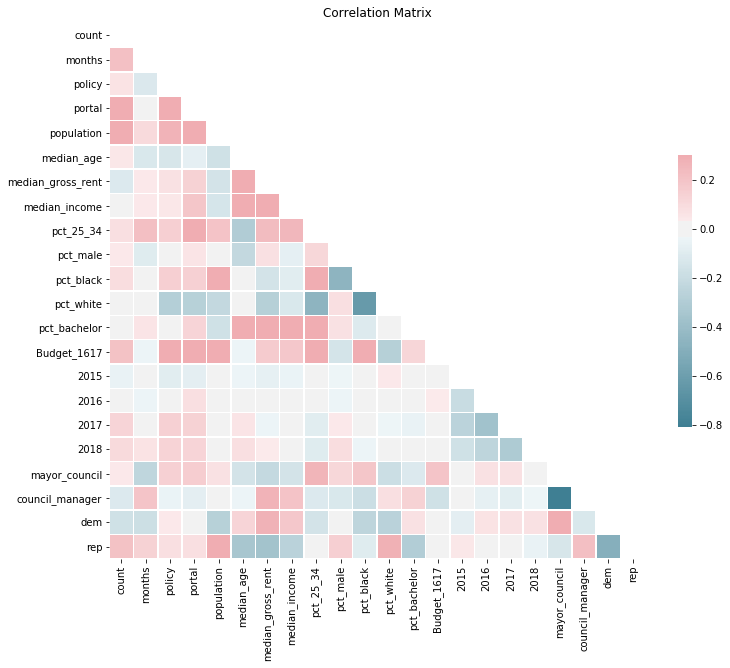

In [208]:
# Variable correlation matrix 
corr_vars = ['count', 'months', 'policy', 'portal',
                    'population',  'median_age', 'median_gross_rent', 'median_income', 'pct_25_34', 'pct_male',
                  'pct_black', 'pct_white', 'pct_bachelor', 'Budget_1617', '2015',
                  '2016', '2017', '2018','mayor_council', 'council_manager', 'dem', 'rep']
corr_df = clean_data[corr_vars]
corr_table = corr_df.corr()

# Colored correlation matrix for display
mask = np.zeros_like(corr_table, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_table, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix")

plt.show()

count


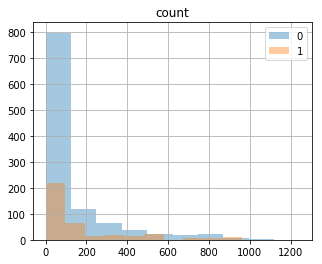

months


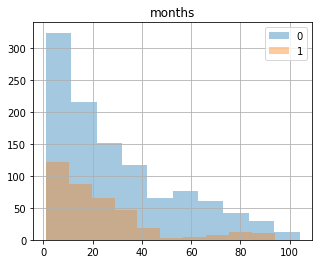

policy


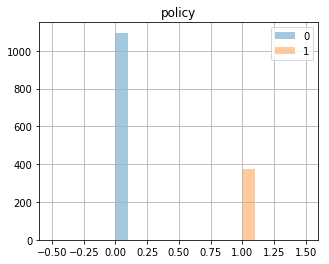

portal


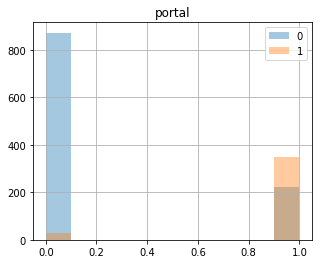

population


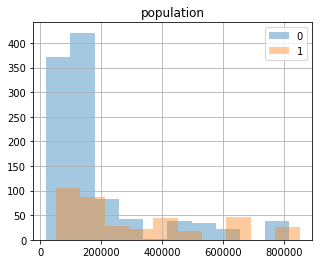

median_age


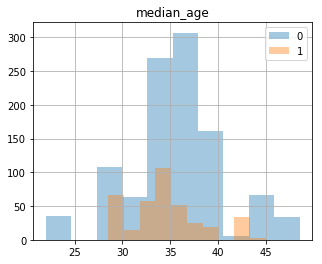

median_gross_rent


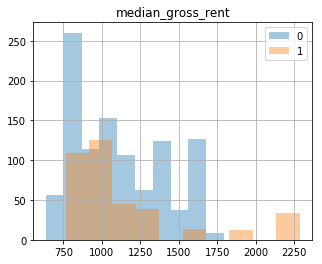

median_income


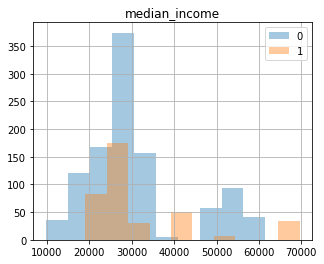

pct_25_34


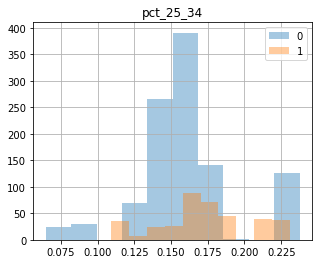

pct_male


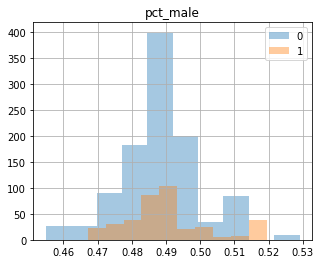

pct_black


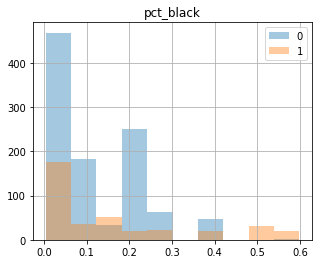

pct_white


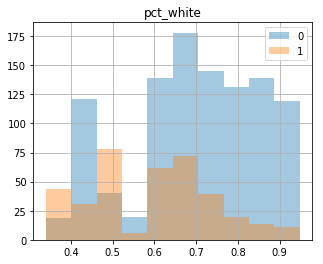

pct_bachelor


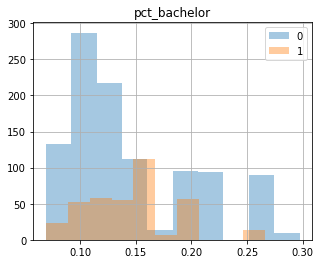

Budget_1617


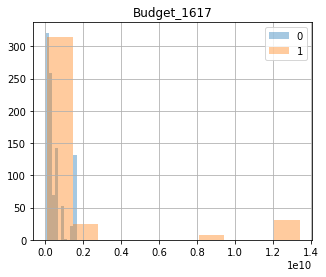

2015


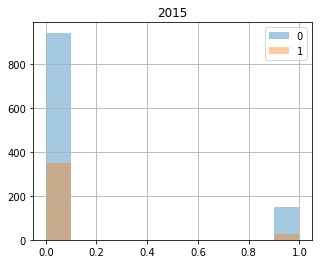

2016


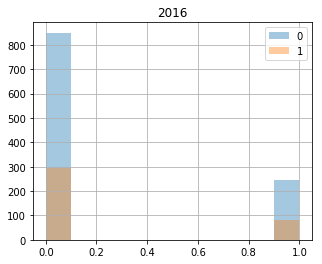

2017


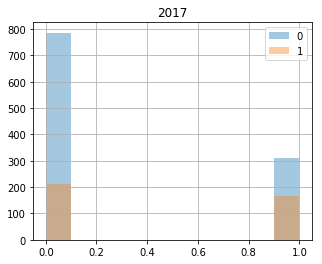

2018


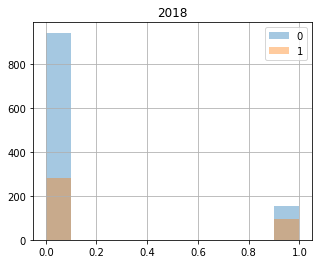

mayor_council


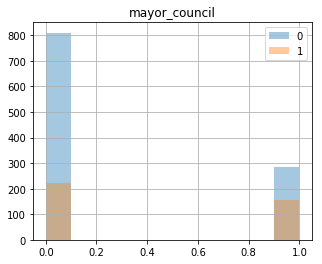

council_manager


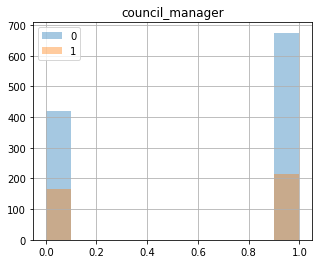

dem


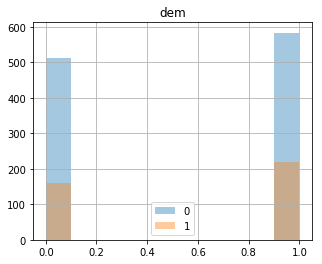

rep


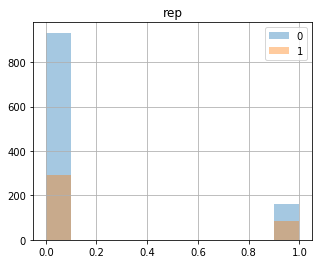

req_ratio


AttributeError: 'NoneType' object has no attribute 'update'

In [210]:
plt.rcParams['figure.figsize'] = 5, 4
grp = corr_df.groupby('policy')
var = corr_df.columns

for v in var:
    print(v)
    grp[v].hist(alpha=0.4)
    plt.title(v)
    plt.legend([0,1])
    plt.show()

In [87]:
avg_count = clean_data.groupby('city_x').mean()
avg_count['treatment'] = np.where(avg_count['policy'] > 0, 1, 0)


In [88]:
dm = avg_count.groupby('treatment').mean()

In [89]:
dm

,count,months,policy_months,portal_months,policy,portal,population,median_age,median_gross_rent,median_income,pct_25_34,pct_male,pct_black,pct_white,pct_bachelor,Budget_1617,2015,2016,2017,2018,mayor_council,council_manager,dem,rep,population_09,median_age_09,median_income_09,pct_25_34_09,pct_male_09,pct_black_09,pct_white_09,pct_bachelor_09,robust_portal,treat_score,year_x,robust_policy
treatment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,124.725052,18.498472,0.000000,3.010394,0.000000,0.166537,132196.300000,37.200000,1117.066667,31208.933333,0.147883,0.492392,0.096748,0.709582,0.144583,3.424194e+08,0.070603,0.173681,0.412018,0.279639,0.322581,0.516129,0.677419,0.064516,121794.200000,35.673333,29170.866667,0.146639,0.495553,0.095749,0.722236,0.132455,0.032258,0.198795,2016.685092,0.000000
1,172.852846,17.466393,27.371155,32.418774,0.827825,0.849532,316906.428571,34.904762,1170.190476,30951.095238,0.166193,0.489792,0.137314,0.640903,0.154480,1.755686e+09,0.072849,0.227506,0.330341,0.291874,0.285714,0.666667,0.476190,0.190476,285556.047619,34.047619,28247.238095,0.158211,0.491353,0.143537,0.650101,0.144117,0.460317,2.286026,2016.626810,0.148352


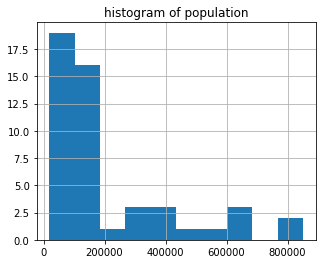

In [60]:
avg_count['population'].hist()
plt.title('histogram of population')
plt.show()

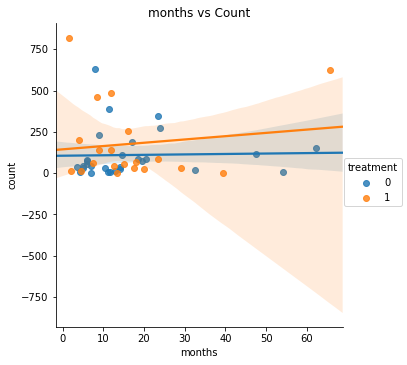

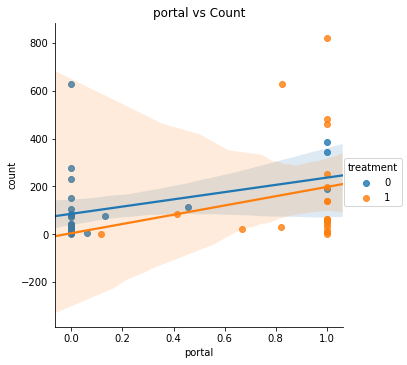

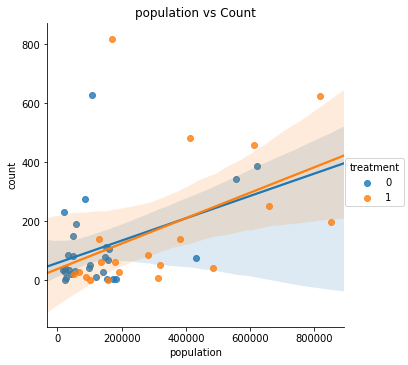

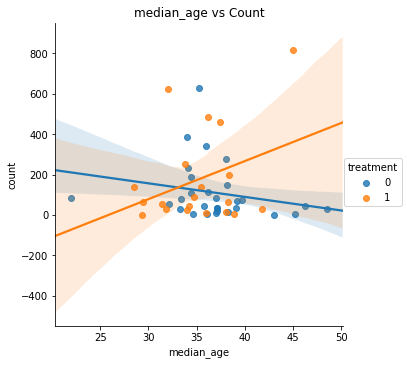

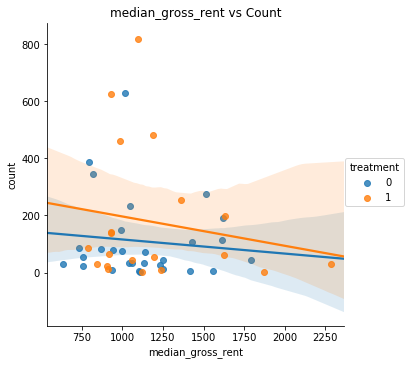

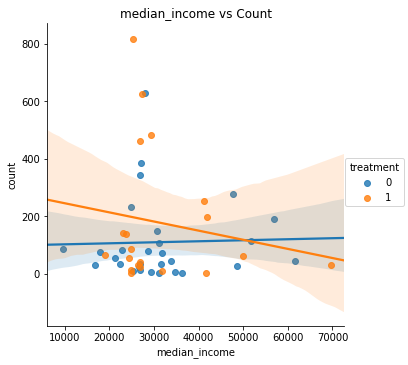

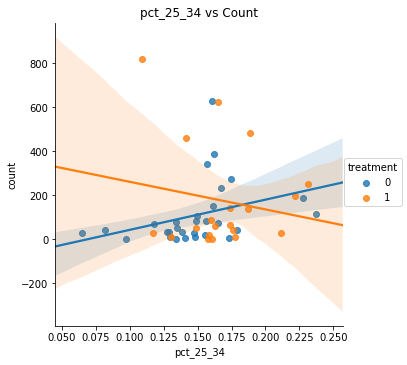

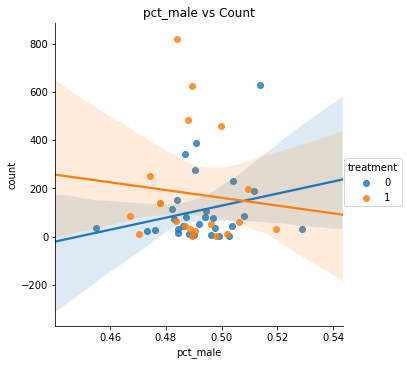

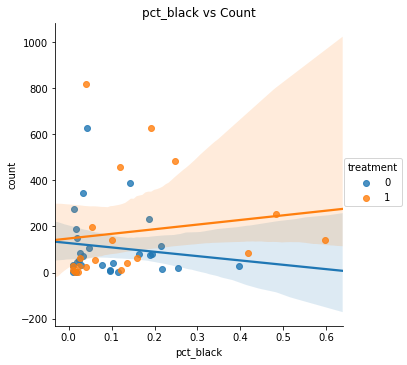

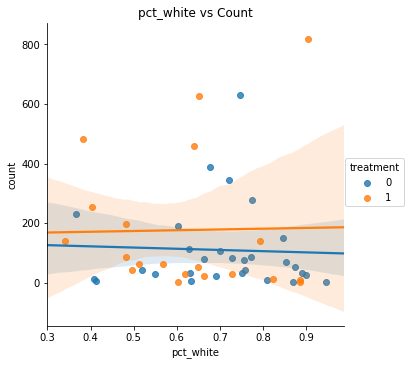

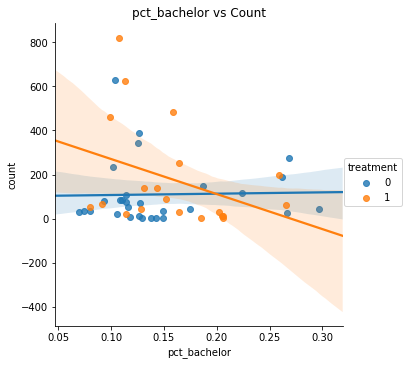

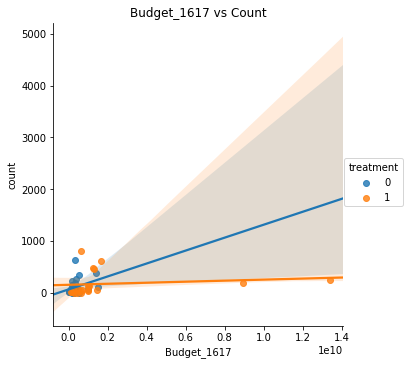

In [61]:
var_list = ['months', 'portal', 'population',  'median_age', 'median_gross_rent', 'median_income', 
            'pct_25_34', 'pct_male', 'pct_black', 'pct_white', 'pct_bachelor', 'Budget_1617']

for var in var_list:
    sns.lmplot( x=var, y="count", data=avg_count, hue='treatment', legend=True)
    title = "{} vs Count".format(var)
    plt.title(title)
    plt.show()

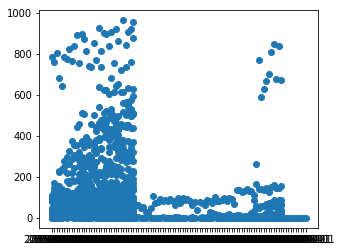

In [62]:
plt.plot_date(clean_data['month_year'], clean_data['count'])
plt.show()

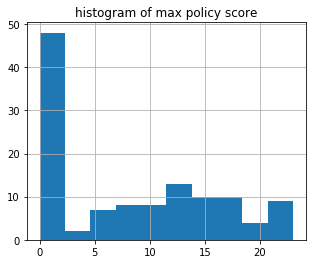

In [63]:
max_all['total'].hist()
plt.title('histogram of max policy score')
plt.show()

In [64]:
ex.dist_table(max_score['total'])

NameError: name 'max_score' is not defined

In [219]:
ratio_df = clean_data[clean_data['req_ratio'] != 'NaN']

In [230]:
ratio_df['req_ratio'] = pd.to_numeric(ratio_df['req_ratio'])

In [231]:
ratio_df['count_diff'] = pd.to_numeric(ratio_df['count_diff'])

In [215]:
corr_vars = ['count', 'months', 'policy', 'portal',
                    'population',  'median_age', 'median_gross_rent', 'median_income', 'pct_25_34', 'pct_male',
                  'pct_black', 'pct_white', 'pct_bachelor', 'Budget_1617', '2015',
                  '2016', '2017', '2018','mayor_council', 'council_manager', 'dem', 'rep', 'req_ratio']
ratio_df = ratio_df[corr_vars]

count


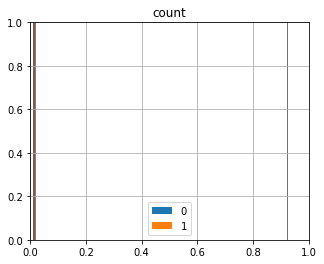

months


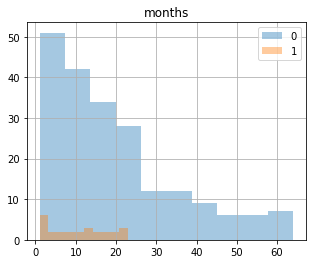

policy


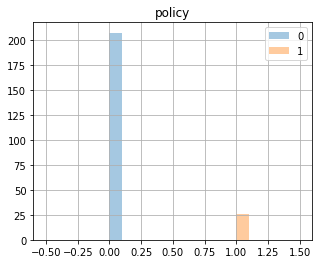

portal


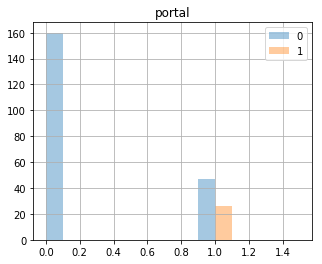

population


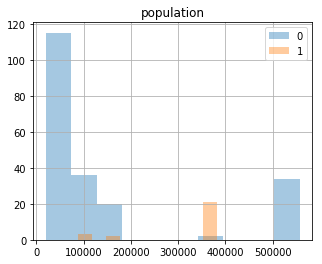

median_age


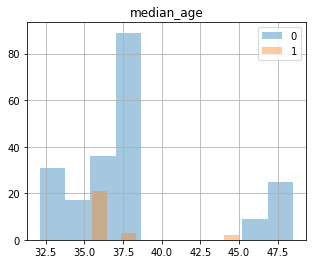

median_gross_rent


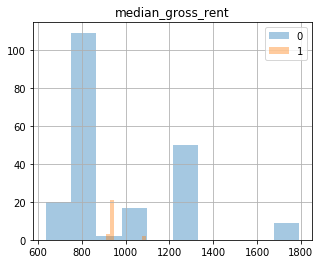

median_income


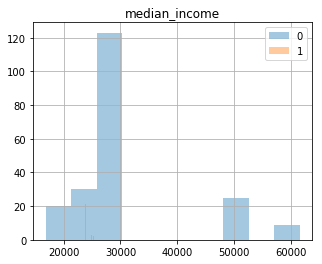

pct_25_34


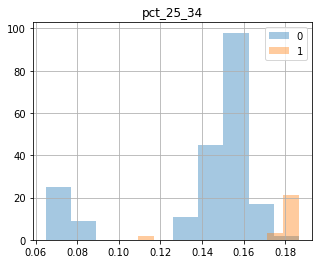

pct_male


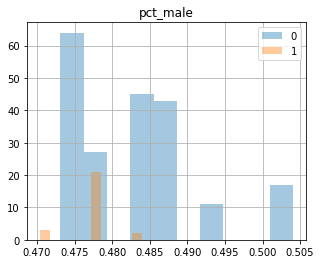

pct_black


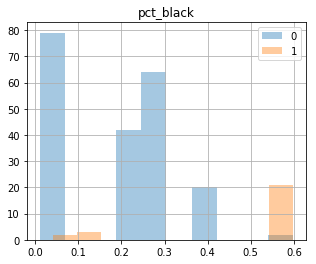

pct_white


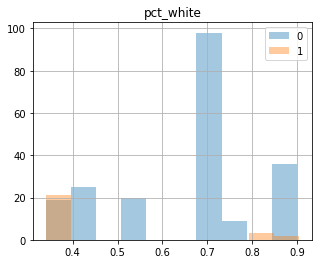

pct_bachelor


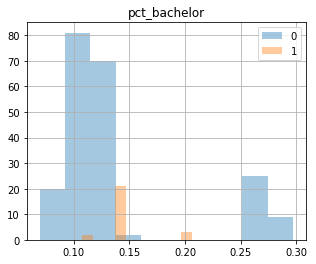

Budget_1617


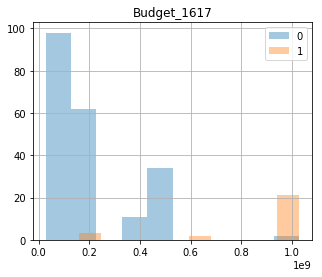

2015


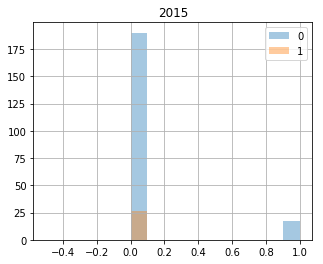

2016


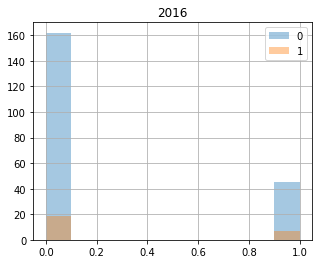

2017


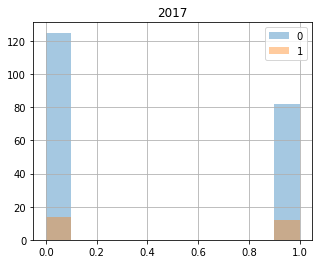

2018


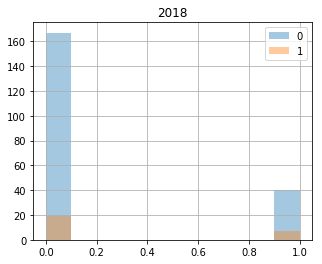

mayor_council


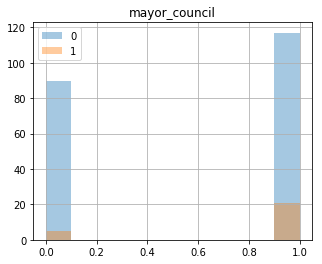

council_manager


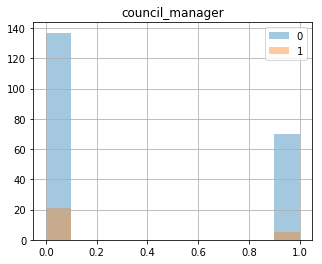

dem


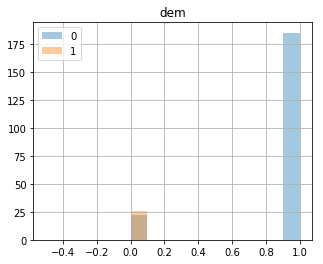

rep


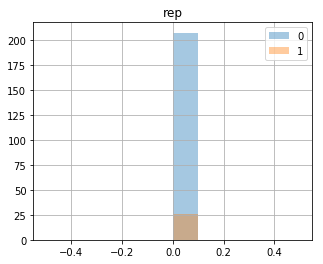

req_ratio


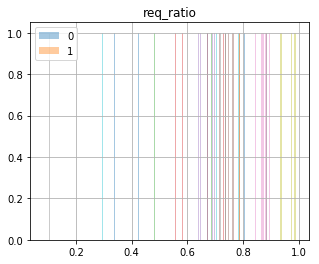

In [216]:
plt.rcParams['figure.figsize'] = 5, 4
grp = ratio_df.groupby('policy')
var = ratio_df.columns

for v in var:
    print(v)
    grp[v].hist(alpha=0.4)
    plt.title(v)
    plt.legend([0,1])
    plt.show()

In [222]:
ratio_df = ratio_df.loc[:, ~ratio_df.columns.duplicated()]

In [236]:
avg_count = ratio_df.groupby('city_x').mean()
avg_count['treatment'] = np.where(avg_count['policy'] > 0, 1, 0)
dm = avg_count.groupby('treatment').mean()

In [237]:
dm

,count,months,policy_months,portal_months,policy,portal,population,median_age,median_gross_rent,median_income,pct_25_34,pct_male,pct_black,pct_white,pct_bachelor,Budget_1617,2015,2016,2017,2018,mayor_council,council_manager,dem,rep,population_09,median_age_09,median_income_09,pct_25_34_09,pct_male_09,pct_black_09,pct_white_09,pct_bachelor_09,robust_portal,treat_score,year,robust_policy,count_diff,req_ratio
treatment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,95.683987,14.187500,0.0,10.3125,0.000000,0.25,128719.375000,38.2,1036.0,31735.000000,0.132155,0.485904,0.142341,0.658094,0.150964,2.007042e+08,0.04182,0.166305,0.474528,0.272425,0.375000,0.500000,0.875,0.0,122346.750000,37.012500,29545.375000,0.133577,0.486743,0.132812,0.681309,0.140666,0.125000,0.375000,2009.0,0.000000,29.971947,0.779706
1,323.705314,5.166667,12.5,28.5000,0.971014,1.00,213505.333333,39.5,978.0,24675.333333,0.157832,0.477377,0.253880,0.689173,0.152298,6.067667e+08,0.00000,0.420290,0.173913,0.405797,0.333333,0.666667,0.000,0.0,184714.333333,38.166667,23197.333333,0.143389,0.476136,0.271361,0.676087,0.127467,0.333333,2.637681,2009.0,0.333333,194.900966,0.635314


In [238]:
policy_diff = ratio_df.groupby('policy').mean()